In [18]:
import torch
import numpy
import torchvision 
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from photosynthesis_metrics.feature_extractors.fid_inception import InceptionV3
from photosynthesis_metrics.fid import FID
from photosynthesis_metrics.kid import KID

In [20]:
## Initialization
fid = FID()
kid = KID()

In [21]:
## Score computation
predicted = torch.rand(1000, 20)
target = torch.rand(1000, 20)

In [22]:
score_fid = fid(predicted, target)
print(score_fid)

tensor(0.0198, dtype=torch.float64)


In [23]:
score_kid = kid(predicted, target)
print(score_kid)

tensor(-0.0004, dtype=torch.float64)


In [24]:
# model = torchvision.models.inception_v3(pretrained=True) 
model_pm = InceptionV3()
# model.eval()
# model_pm.eval()

In [45]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = torch.randn(10, 3, 512, 512)
        self.target = torch.randint(10, (10,))
        
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        return {'images': x, 'target': y}
    
    def __len__(self):
        return len(self.data)

dataset = MyDataset()
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=3,
    num_workers=2
)

In [47]:
for batch in loader:
    break
print(batch['images'].shape)
result = model_pm(batch['images'])

torch.Size([3, 3, 512, 512])


In [54]:
result[0].view(3, -1).shape

torch.Size([3, 2048])

In [30]:
fid._compute_feats(loader, model_pm, device='cpu')

AttributeError: 'list' object has no attribute 'view'

In [47]:

# for batch in loader:
#     data = batch['data']
#     target = batch['target']
#     mask = batch['mask']
#     print(data.shape, target.shape, mask.shape, target)

In [85]:
# prediction = torch.zeros((1, 1, 10, 10))
target = torch.zeros((1, 1, 10, 10))
prediction = torch.eye(10).reshape((1, 1, 10, 10))
w_variance = torch.sum(torch.abs(x[:,:,:,1:] - x[:,:,:,:-1]), dim=[1, 2, 3])
h_variance = torch.sum(torch.abs(x[:,:,1:,:] - x[:,:,:-1,:]), dim=[1, 2, 3])

# tv_val = torch.sqrt(h_variance + w_variance)
   
        
# print(w_variance, h_variance)
# tv_val = (h_variance + w_variance)
total_variation(prediction, size_average=False, reduction_type='l1')
# target.shape
# prediction.shape
l = TVLoss(reduction_type='l1')
l(target, prediction)

tensor(36.)

In [64]:
mock_X = torch.rand((3, 3, 256, 256))
print(total_variation(mock_X, size_average=False, reduction_type='l1'))
print(total_variation(mock_X, size_average=False, reduction_type='l2'))
print(total_variation(mock_X, size_average=False, reduction_type='l2_squared'))

tensor([130493.4609, 130577.8125, 130641.4219])
tensor([255.4247, 255.6732, 255.6506])
tensor([65241.7539, 65368.8047, 65357.2500])


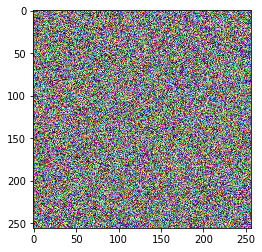

In [69]:
plt.imshow(mock_X.numpy()[0].reshape(256, 256, 3))

In [14]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = torch.randn(10, 3, 24, 24)
        self.mask = torch.randn(10, 3, 24, 24)
        self.target = torch.randint(10, (10,))
        
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        z = self.mask[index]
        
        return {'data': x, 'target': y, 'mask': z}
    
    def __len__(self):
        return len(self.data)

dataset = MyDataset()
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=3,
    num_workers=2
)

for batch in loader:
    data = batch['data']
    target = batch['target']
    mask = batch['mask']
    print(data.shape, target.shape, mask.shape, target)

torch.Size([3, 3, 24, 24]) torch.Size([3]) torch.Size([3, 3, 24, 24]) tensor([6, 3, 1])
torch.Size([3, 3, 24, 24]) torch.Size([3]) torch.Size([3, 3, 24, 24]) tensor([4, 4, 5])
torch.Size([3, 3, 24, 24]) torch.Size([3]) torch.Size([3, 3, 24, 24]) tensor([6, 4, 8])
torch.Size([1, 3, 24, 24]) torch.Size([1]) torch.Size([1, 3, 24, 24]) tensor([8])
